# Chapter 14: Recurrent Neural Networks
-----
-----

Class of networks that can predict the future. They analyze time series data such as, stock prices, and tell you when to buy or sell. In automomous driving systems, they can anticipate car trajectory and help avoid accidents. The work with sequence of arbitary length.

Can take in:
- sentences
- documents
- audio samples

useful in:
- NPL
- speech to text
- sentiment analysis

can be used to generate, melodies, sentences, image captions and more.

## Recurrent Neurons
Looks very much like a feedforward net, except it also has connections pointing backwards.

Simples RNN: One neuron receiving inputs, producing out puts, and sending those outputs back to itself.

At each time step t, this recurrent neuron receives the inputs $x_{(t)}$ as well as its own output from the pervious time step, $y_{(t-1)}$

Each recurrent neuron has two sets of weights: one for the inputs and the other for the output of the pervious time step. At time stepp 0 previous input assumed to be zero

#### Memory Cells

Since output of recurrent neuron at time step t is a function of all the inputs previous time steps, you could say it has a form of memory. Part of a nueral net that preserves some state across time steps is called a memory cell

#### Input and Output Sequences

RNN can simultaneously take a sequence of iputs and produce a sequence of outputs. This type of network is usedful for predicting time series such as stock prices.

Alternatively: feed network a sequence of inputs, and ignore all outputs except for the last one. sequence to vector

conversely: feed network single input at first time step, and let it output a sequence, vector to sequence

lastly: a sequence-to-vector (encoder) then followed by a vector-to-sequence(decoder). can be used for tanslating a sentence.Encoder-Decoder

## Basic RNNs in Tensorflow
-----



In [2]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import tensorflow as tf

In [3]:
reset_graph()

n_inputs = 3
n_neurons = 5

X0 = tf.placeholder(tf.float32, [None, n_inputs])
X1 = tf.placeholder(tf.float32, [None, n_inputs])

Wx = tf.Variable(tf.random_normal(shape=[n_inputs, n_neurons], dtype=tf.float32))
Wy = tf.Variable(tf.random_normal(shape=[n_neurons, n_neurons], dtype=tf.float32))

b = tf.Variable(tf.zeros([1, n_neurons], dtype=tf.float32))

Y0 = tf.tanh(tf.matmul(X0, Wx) + b)
Y1 = tf.tanh(tf.matmul(Y0, Wy) + tf.matmul(X1, Wx) + b)

init = tf.global_variables_initializer()

In [4]:
X0_batch = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]]) # t = 0
X1_batch = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]]) # t = 1

with tf.Session() as sess:
    init.run()
    Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict={X0: X0_batch, X1: X1_batch})

In [5]:
print(Y0_val)

[[-0.06640061  0.9625767   0.6810579   0.7091854  -0.89821595]
 [ 0.99777555 -0.7197888  -0.99657613  0.96739244 -0.99989706]
 [ 0.99999785 -0.9989881  -0.99999887  0.9967763  -0.9999999 ]
 [ 1.         -1.         -1.         -0.9981892   0.9995087 ]]


In [6]:
print(Y1_val)

[[ 1.         -1.         -1.          0.40200272 -0.99999994]
 [-0.12210429  0.62805295  0.96718436 -0.9937122  -0.2583933 ]
 [ 0.99999815 -0.9999994  -0.99999744 -0.8594331  -0.99998796]
 [ 0.99928296 -0.9999981  -0.9999059   0.98579615 -0.9220575 ]]


#### Static Unrolling Through Time

In [7]:
reset_graph()


n_steps = 2
n_inputs = 3
n_neurons = 5


X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
X_seqs = tf.unstack(tf.transpose(X, perm=[1, 0, 2]))

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
output_seqs, states = tf.contrib.rnn.static_rnn(basic_cell, X_seqs,
                                                dtype=tf.float32)
outputs = tf.transpose(tf.stack(output_seqs), perm=[1, 0, 2])

init = tf.global_variables_initializer()

In [8]:
X_batch = np.array([
        # t = 0      t = 1 
        [[0, 1, 2], [9, 8, 7]], # instance 1
        [[3, 4, 5], [0, 0, 0]], # instance 2
        [[6, 7, 8], [6, 5, 4]], # instance 3
        [[9, 0, 1], [3, 2, 1]], # instance 4
    ])

with tf.Session() as sess:
    init.run()
    outputs_val = outputs.eval(feed_dict={X: X_batch})

In [9]:
print(outputs_val)

[[[-0.4565232  -0.6806412   0.40938237  0.631045   -0.45732823]
  [-0.94288003 -0.9998869   0.9405581   0.99999845 -0.99999976]]

 [[-0.80015343 -0.99218273  0.78177965  0.9971032  -0.9964609 ]
  [-0.637116    0.11300934  0.5798437   0.43105593 -0.6371699 ]]

 [[-0.93605185 -0.99983793  0.9308867   0.9999814  -0.99998313]
  [-0.9165386  -0.99456036  0.89605415  0.9998719  -0.9999751 ]]

 [[ 0.99273676 -0.9981933  -0.5554365   0.99890316 -0.9953323 ]
  [-0.02746333 -0.7319198   0.7827872   0.9525682  -0.9781772 ]]]


In [10]:
print(np.transpose(outputs_val, axes=[1, 0, 2])[1])

[[-0.94288003 -0.9998869   0.9405581   0.99999845 -0.99999976]
 [-0.637116    0.11300934  0.5798437   0.43105593 -0.6371699 ]
 [-0.9165386  -0.99456036  0.89605415  0.9998719  -0.9999751 ]
 [-0.02746333 -0.7319198   0.7827872   0.9525682  -0.9781772 ]]


#### Dynamic Unrolling Through Time

much better and cleaner.

In [11]:
n_steps = 2
n_inputs = 3
n_neurons = 5

reset_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

init = tf.global_variables_initializer()


In [12]:
X_batch = np.array([
        [[0, 1, 2], [9, 8, 7]], # instance 1
        [[3, 4, 5], [0, 0, 0]], # instance 2
        [[6, 7, 8], [6, 5, 4]], # instance 3
        [[9, 0, 1], [3, 2, 1]], # instance 4
    ])

with tf.Session() as sess:
    init.run()
    outputs_val = outputs.eval(feed_dict={X: X_batch})

In [13]:
print(outputs_val)

[[[-0.85115266  0.8735834   0.5802911   0.8954789  -0.0557505 ]
  [-0.99999595  0.9999957   0.9981816   1.          0.37679613]]

 [[-0.99832934  0.9992038   0.98071444  0.99998486  0.25192654]
  [-0.7081804  -0.07723369 -0.8522789   0.5845347  -0.7878094 ]]

 [[-0.9999826   0.9999953   0.99928635  1.          0.51590705]
  [-0.9993956   0.9984095   0.83422637  0.9999998  -0.47325197]]

 [[ 0.87888587  0.07356028  0.9721692   0.9998546  -0.7351168 ]
  [-0.9134514   0.3600957   0.7624865   0.99817705  0.80142   ]]]


#### Handling Variable Lenght Input Sequence

set sequence length parameter when calling dynamic_rnn

In [14]:
n_steps = 2
n_inputs = 3
n_neurons = 5

reset_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)

In [15]:
seq_length = tf.placeholder(tf.int32, [None])
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32,
                                    sequence_length=seq_length)

In [16]:
init = tf.global_variables_initializer()

In [17]:
X_batch = np.array([
        # step 0     step 1
        [[0, 1, 2], [9, 8, 7]], # instance 1
        [[3, 4, 5], [0, 0, 0]], # instance 2 (padded with zero vectors)
        [[6, 7, 8], [6, 5, 4]], # instance 3
        [[9, 0, 1], [3, 2, 1]], # instance 4
    ])
seq_length_batch = np.array([2, 1, 2, 2])

In [18]:
with tf.Session() as sess:
    init.run()
    outputs_val, states_val = sess.run(
        [outputs, states], feed_dict={X: X_batch, seq_length: seq_length_batch})

#### Handling Variable-Length Output Sequences

solution is to define a secial output called an end-of-sequence token

## Training RNNs
-----

The trick is to unroll it through time and use regular backprop(backpropagation through time)
- first pass through unrolled network
- then output sequence is evaluated using a cost function $C(Y_{(t_min)}, Y_{(t_min + 1)}, ..., Y_{(t_max)}$
- Gradients of cost function propagated backward through the unrolled network
- finally model parameters are updated using the gradients computed during BPTT

NOTE: Gradients flow backward through all the outputs used by the cost function, not just final output. Since W and b are used at each time step, backprop will do the right thing and sum over all time steps

#### Training a Sequence Classifier


In [19]:
reset_graph()

n_steps = 28
n_inputs = 28
n_neurons = 150
n_outputs = 10

learning_rate = 0.001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

logits = tf.layers.dense(states, n_outputs)
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)

loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

In [21]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")
X_test = mnist.test.images.reshape((-1, n_steps, n_inputs))
y_test = mnist.test.labels

Extracting /tmp/data/train-images-idx3-ubyte.gz


Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [23]:
n_epochs = 100
batch_size = 150

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            X_batch = X_batch.reshape((-1, n_steps, n_inputs))
            sess.run(training_op, feed_dict={X:X_batch, y:y_batch})
        acc_train = accuracy.eval(feed_dict={X:X_batch, y:y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

0 Train accuracy: 0.96 Test accuracy: 0.9278


1 Train accuracy: 0.96666664 Test accuracy: 0.9477


2 Train accuracy: 0.96 Test accuracy: 0.9578


3 Train accuracy: 0.9533333 Test accuracy: 0.9618


4 Train accuracy: 0.99333334 Test accuracy: 0.9626


5 Train accuracy: 0.97333336 Test accuracy: 0.9669


6 Train accuracy: 0.9866667 Test accuracy: 0.9651


7 Train accuracy: 0.94 Test accuracy: 0.9689


8 Train accuracy: 0.9866667 Test accuracy: 0.9673


9 Train accuracy: 0.98 Test accuracy: 0.9736


10 Train accuracy: 0.99333334 Test accuracy: 0.9689


11 Train accuracy: 0.99333334 Test accuracy: 0.9746


12 Train accuracy: 0.9866667 Test accuracy: 0.9751


13 Train accuracy: 0.97333336 Test accuracy: 0.9684


14 Train accuracy: 1.0 Test accuracy: 0.9775


15 Train accuracy: 0.99333334 Test accuracy: 0.9751


16 Train accuracy: 0.9866667 Test accuracy: 0.9728


17 Train accuracy: 0.9866667 Test accuracy: 0.9694


18 Train accuracy: 0.9866667 Test accuracy: 0.9737


19 Train accuracy: 0.99333334 Test accuracy: 0.9766


20 Train accuracy: 0.98 Test accuracy: 0.9775


21 Train accuracy: 0.9866667 Test accuracy: 0.9769


22 Train accuracy: 0.9866667 Test accuracy: 0.9755


23 Train accuracy: 0.99333334 Test accuracy: 0.9719


24 Train accuracy: 0.9866667 Test accuracy: 0.9728


25 Train accuracy: 0.99333334 Test accuracy: 0.9737


26 Train accuracy: 0.99333334 Test accuracy: 0.9762


27 Train accuracy: 0.99333334 Test accuracy: 0.9753


28 Train accuracy: 0.99333334 Test accuracy: 0.977


29 Train accuracy: 0.99333334 Test accuracy: 0.971


30 Train accuracy: 0.98 Test accuracy: 0.9757


31 Train accuracy: 0.99333334 Test accuracy: 0.9772


32 Train accuracy: 0.9866667 Test accuracy: 0.9808


33 Train accuracy: 0.98 Test accuracy: 0.9734


34 Train accuracy: 1.0 Test accuracy: 0.9774


35 Train accuracy: 0.99333334 Test accuracy: 0.9776


36 Train accuracy: 0.97333336 Test accuracy: 0.9786


37 Train accuracy: 1.0 Test accuracy: 0.9801


38 Train accuracy: 0.99333334 Test accuracy: 0.9772


39 Train accuracy: 0.99333334 Test accuracy: 0.9687


40 Train accuracy: 0.9866667 Test accuracy: 0.9794


41 Train accuracy: 0.9866667 Test accuracy: 0.9771


42 Train accuracy: 0.98 Test accuracy: 0.9801


43 Train accuracy: 1.0 Test accuracy: 0.9768


44 Train accuracy: 0.9866667 Test accuracy: 0.9765


45 Train accuracy: 0.9866667 Test accuracy: 0.9755


46 Train accuracy: 0.99333334 Test accuracy: 0.9755


47 Train accuracy: 0.9866667 Test accuracy: 0.9732


48 Train accuracy: 0.99333334 Test accuracy: 0.9781


49 Train accuracy: 0.98 Test accuracy: 0.9766


50 Train accuracy: 0.99333334 Test accuracy: 0.9772


51 Train accuracy: 1.0 Test accuracy: 0.9776


52 Train accuracy: 0.99333334 Test accuracy: 0.9748


53 Train accuracy: 0.99333334 Test accuracy: 0.9744


54 Train accuracy: 0.9866667 Test accuracy: 0.9785


55 Train accuracy: 0.9866667 Test accuracy: 0.9757


56 Train accuracy: 0.9866667 Test accuracy: 0.9705


57 Train accuracy: 0.9866667 Test accuracy: 0.9772


58 Train accuracy: 1.0 Test accuracy: 0.977


59 Train accuracy: 0.99333334 Test accuracy: 0.9759


60 Train accuracy: 0.9866667 Test accuracy: 0.9764


61 Train accuracy: 0.9866667 Test accuracy: 0.9772


62 Train accuracy: 0.99333334 Test accuracy: 0.9732


63 Train accuracy: 0.99333334 Test accuracy: 0.9799


64 Train accuracy: 0.98 Test accuracy: 0.9722


65 Train accuracy: 0.99333334 Test accuracy: 0.9778


66 Train accuracy: 0.99333334 Test accuracy: 0.9786


67 Train accuracy: 1.0 Test accuracy: 0.9792


68 Train accuracy: 1.0 Test accuracy: 0.975


69 Train accuracy: 0.99333334 Test accuracy: 0.9774


70 Train accuracy: 1.0 Test accuracy: 0.9779


71 Train accuracy: 1.0 Test accuracy: 0.9779


72 Train accuracy: 0.98 Test accuracy: 0.976


73 Train accuracy: 1.0 Test accuracy: 0.9779


74 Train accuracy: 0.99333334 Test accuracy: 0.9774


75 Train accuracy: 1.0 Test accuracy: 0.9783


76 Train accuracy: 0.99333334 Test accuracy: 0.977


77 Train accuracy: 1.0 Test accuracy: 0.9817


78 Train accuracy: 0.9866667 Test accuracy: 0.9784


79 Train accuracy: 0.99333334 Test accuracy: 0.9723


80 Train accuracy: 0.99333334 Test accuracy: 0.9738


81 Train accuracy: 1.0 Test accuracy: 0.9791


82 Train accuracy: 0.99333334 Test accuracy: 0.9764


83 Train accuracy: 0.9866667 Test accuracy: 0.9796


84 Train accuracy: 0.99333334 Test accuracy: 0.975


85 Train accuracy: 0.99333334 Test accuracy: 0.9766


86 Train accuracy: 0.99333334 Test accuracy: 0.9775


87 Train accuracy: 0.99333334 Test accuracy: 0.9777


88 Train accuracy: 1.0 Test accuracy: 0.9835


89 Train accuracy: 0.99333334 Test accuracy: 0.9767


90 Train accuracy: 0.99333334 Test accuracy: 0.9749


91 Train accuracy: 0.99333334 Test accuracy: 0.9744


92 Train accuracy: 1.0 Test accuracy: 0.976


93 Train accuracy: 1.0 Test accuracy: 0.9796


94 Train accuracy: 1.0 Test accuracy: 0.9769


95 Train accuracy: 0.98 Test accuracy: 0.9782


96 Train accuracy: 1.0 Test accuracy: 0.9784


97 Train accuracy: 0.99333334 Test accuracy: 0.9792


98 Train accuracy: 0.99333334 Test accuracy: 0.9759


99 Train accuracy: 0.99333334 Test accuracy: 0.9762


##### Multi-layer RNN

In [25]:
reset_graph()

n_steps = 28
n_inputs = 28
n_outputs = 10

learning_rate = 0.001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

n_neurons = 100
n_layers = 3

layers = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons,
                                      activation=tf.nn.relu)
          for layer in range(n_layers)]
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers)
outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

states_concat = tf.concat(axis=1, values=states)
logits = tf.layers.dense(states_concat, n_outputs)
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

n_epochs = 10
batch_size = 150

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            X_batch = X_batch.reshape((-1, n_steps, n_inputs))
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

0 Train accuracy: 0.9866667 Test accuracy: 0.9421


1 Train accuracy: 0.98 Test accuracy: 0.9454


2 Train accuracy: 0.98 Test accuracy: 0.9692


3 Train accuracy: 0.97333336 Test accuracy: 0.9698


4 Train accuracy: 0.9533333 Test accuracy: 0.9738


5 Train accuracy: 0.9866667 Test accuracy: 0.98


6 Train accuracy: 0.9533333 Test accuracy: 0.9768


7 Train accuracy: 0.9866667 Test accuracy: 0.9812


8 Train accuracy: 0.99333334 Test accuracy: 0.9805


9 Train accuracy: 1.0 Test accuracy: 0.9757


#### Training to Predict Time Series

How to handle times series, such as, stock prices, air temperature, brain wave patterns, ...

Will Train RNN to predict next value in a generated time series.

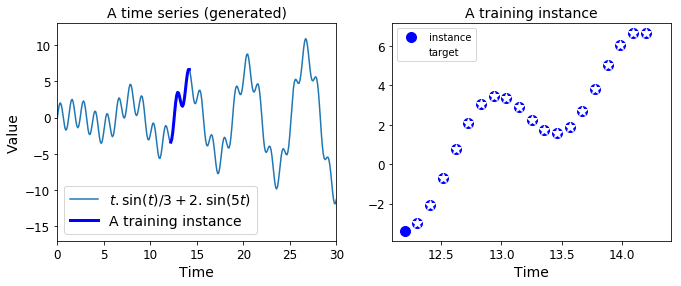

In [35]:
t_min, t_max = 0, 30
resolution = 0.1

def time_series(t):
    return t * np.sin(t) / 3 + 2 * np.sin(t*5)

def next_batch(batch_size, n_steps):
    t0 = np.random.rand(batch_size, 1) * (t_max - t_min - n_steps * resolution)
    Ts = t0 + np.arange(0., n_steps + 1) * resolution
    ys = time_series(Ts)
    return ys[:, :-1].reshape(-1, n_steps, 1), ys[:, 1:].reshape(-1, n_steps, 1)

t = np.linspace(t_min, t_max, int((t_max - t_min) / resolution))

n_steps = 20
t_instance = np.linspace(12.2, 12.2 + resolution * (n_steps + 1), n_steps + 1)

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title("A time series (generated)", fontsize=14)
plt.plot(t, time_series(t), label=r"$t . \sin(t) / 3 + 2 . \sin(5t)$")
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "b-", linewidth=3, label="A training instance")
plt.legend(loc="lower left", fontsize=14)
plt.axis([0, 30, -17, 13])
plt.xlabel("Time")
plt.ylabel("Value")

plt.subplot(122)
plt.title("A training instance", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

In [29]:
reset_graph()

n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
# cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
# outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

At each time step we have an output vector of size 100, but we want a single output value at each time step: solution is to wrap thecell in an OutputProjectionWrapper. Acts like a normal cell, proxying every method call to an underlying cell, but also adds some functionality. Adds a fully connected layer of linear neurons on top of each output.

In [30]:
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu),
    output_size=n_outputs
)

In [31]:
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [32]:
# using MSE as in previous regression tasks

learning_rate = 0.001

loss = tf.reduce_mean(tf.square(outputs - y)) # MSE
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

In [33]:
saver = tf.train.Saver()

In [36]:
n_iterations = 1500
batch_size = 50

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    
    saver.save(sess, "tmp_models/ch14_my_time_series_model")

0 	MSE: 11.967253


100 	MSE: 0.5226388


200 	MSE: 0.1505317


300 	MSE: 0.07337479


400 	MSE: 0.06307488


500 	MSE: 0.058736313


600 	MSE: 0.053429067


700 	MSE: 0.04863796


800 	MSE: 0.05172879


900 	MSE: 0.04709948


1000 	MSE: 0.047031786


1100 	MSE: 0.048212465


1200 	MSE: 0.041239616


1300 	MSE: 0.047570735


1400 	MSE: 0.041913968


In [37]:
with tf.Session() as sess:                         
    saver.restore(sess, "tmp_models/ch14_my_time_series_model")   

    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={X: X_new})

INFO:tensorflow:Restoring parameters from tmp_models/ch14_my_time_series_model


In [38]:
y_pred

array([[[-3.4085307 ],
        [-2.4495344 ],
        [-1.1283568 ],
        [ 0.79252553],
        [ 2.1931982 ],
        [ 3.1304042 ],
        [ 3.4483178 ],
        [ 3.3188756 ],
        [ 2.88319   ],
        [ 2.2525046 ],
        [ 1.667691  ],
        [ 1.5240448 ],
        [ 1.90556   ],
        [ 2.721264  ],
        [ 3.907832  ],
        [ 5.1493607 ],
        [ 6.1438413 ],
        [ 6.6646748 ],
        [ 6.6405025 ],
        [ 6.0708013 ]]], dtype=float32)

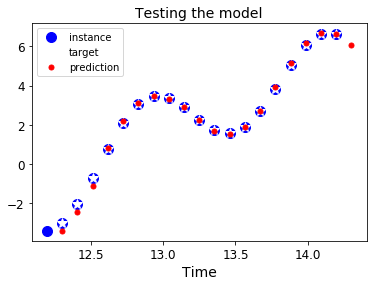

In [40]:
plt.title("Testing the model", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target")
plt.plot(t_instance[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

Using OutputProjectionWrapper is the simplest solution to reduce the dimensionality of the RNN's output sequence down to just one value per time step, but its is not the most efficient.

Can reshape RNN output from [batch_size, n_steps, n_neurons] to [batch_size * n_steps, n_neurons], then apply a single fully connected layer with the appropriate output size, which will result in an output tensor of shape [batch_size * n_steps, n_outputs], then reshape that tensor to [batch_size, n_steps, n_outputs]

In [41]:
reset_graph()

n_steps = 20
n_inputs = 1
n_neurons = 100

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

In [42]:
cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
rnn_outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [43]:
n_outputs = 1
learning_rate = 0.001

In [44]:
stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])

In [45]:
loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [47]:
n_iterations = 1500
batch_size = 50

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    
    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={X: X_new})
    
    saver.save(sess, "tmp_models/ch14_my_time_series_model_2")

0 	MSE: 18.78892


100 	MSE: 0.52657694


200 	MSE: 0.30731794


300 	MSE: 0.07393924


400 	MSE: 0.06742107


500 	MSE: 0.053571284


600 	MSE: 0.042269114


700 	MSE: 0.047427326


800 	MSE: 0.055147786


900 	MSE: 0.045811933


1000 	MSE: 0.0427394


1100 	MSE: 0.039586022


1200 	MSE: 0.040910203


1300 	MSE: 0.03954869


1400 	MSE: 0.035478625


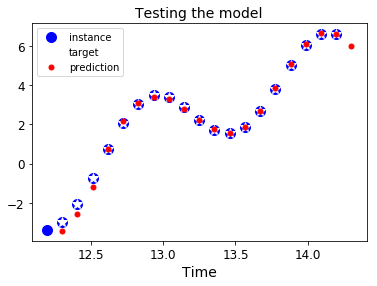

In [49]:
plt.title("Testing the model", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target")
plt.plot(t_instance[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

#### Creative RNN
we have a model that can predict the future, so we can use it to generate some create sequences.

In [50]:
with tf.Session() as sess:                       
    saver.restore(sess, "tmp_models/ch14_my_time_series_model_2")

    sequence = [0.] * n_steps
    for iteration in range(300):
        X_batch = np.array(sequence[-n_steps:]).reshape(1, n_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        sequence.append(y_pred[0, -1, 0])


INFO:tensorflow:Restoring parameters from tmp_models/ch14_my_time_series_model_2


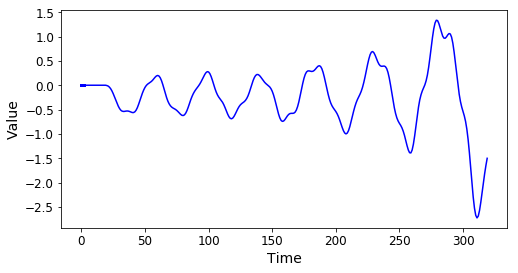

In [51]:
plt.figure(figsize=(8,4))
plt.plot(np.arange(len(sequence)), sequence, "b-")
plt.plot(t[:n_steps], sequence[:n_steps], "b-", linewidth=3)
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

## Deep RNNs
-----
It is common to stack multiple layers of cells. In tensorflow, create several cells and stack them into a MultiRNNCell

In [53]:
reset_graph()

n_inputs = 2
n_steps = 5

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])

n_neurons = 100
n_layers = 10

layers = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
          for layer in range(n_layers)]
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers)
outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

init = tf.global_variables_initializer()

In [55]:
X_batch = np.random.rand(2, n_steps, n_inputs)

with tf.Session() as sess:
    init.run()
    outputs_val, states_val = sess.run([outputs, states], feed_dict={X: X_batch})
    
outputs_val.shape

(2, 5, 100)

#### Distributing a Deep RNN Across Multiple GPUs

CH12 pointed out that we can distribute Deep networks across multiple GPUs by pinning each layer to a different GPU. However if you try to create each cell in a different device() block, it will not work.

In [ ]:
with tf.device("/gpu:0"):  # BAD! This is ignored.
    layer1 = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)

with tf.device("/gpu:1"):  # BAD! Ignored again.
    layer2 = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)

Trick is to create own cell wrapper

In [56]:
import tensorflow as tf

class DeviceCellWrapper(tf.contrib.rnn.RNNCell):
  def __init__(self, device, cell):
    self._cell = cell
    self._device = device

  @property
  def state_size(self):
    return self._cell.state_size

  @property
  def output_size(self):
    return self._cell.output_size

  def __call__(self, inputs, state, scope=None):
    with tf.device(self._device):
        return self._cell(inputs, state, scope)

In [57]:
reset_graph()

n_inputs = 5
n_steps = 20
n_neurons = 100

X = tf.placeholder(tf.float32, shape=[None, n_steps, n_inputs])

In [58]:
devices = ["/cpu:0", "/cpu:0", "/cpu:0"] # replace with ["/gpu:0", "/gpu:1", "/gpu:2"] if you have 3 GPUs
cells = [DeviceCellWrapper(dev,tf.contrib.rnn.BasicRNNCell(num_units=n_neurons))
         for dev in devices]
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(cells)
outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

In [59]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    print(sess.run(outputs, feed_dict={X: np.random.rand(2, n_steps, n_inputs)}))

[[[-3.29020061e-02  1.17019236e-01 -4.58992608e-02 ...  3.84477153e-02
   -5.24900258e-02  5.80436960e-02]
  [ 3.54288332e-02 -7.42610693e-02 -6.42375052e-02 ... -2.45757148e-01
   -1.77626804e-01 -3.26535292e-03]
  [ 2.59726584e-01  1.44605249e-01  3.29312116e-01 ...  3.38821977e-01
    5.98853417e-02 -8.31450596e-02]
  ...
  [ 1.18043743e-01 -2.41663873e-01 -8.27798247e-01 ... -1.85782462e-01
    1.89682379e-01 -1.35261893e-01]
  [ 2.87830859e-01  3.92953992e-01 -3.15236300e-01 ... -7.85605535e-02
    4.32724983e-01 -6.61824420e-02]
  [ 7.49779761e-01  6.11052871e-01 -3.01685542e-01 ...  1.95649698e-01
   -1.62457466e-01 -5.23968339e-02]]

 [[-6.68027624e-02  7.35576972e-02 -2.90275402e-02 ... -7.79968277e-02
   -3.65773253e-02 -4.66752201e-02]
  [ 1.71546549e-01  4.28418722e-03  2.18812120e-03 ...  3.68538052e-02
   -8.13241452e-02  9.01001915e-02]
  [ 3.45635489e-02 -9.57525298e-02  1.59450233e-01 ...  1.63022086e-01
   -6.83046281e-02  1.07990295e-01]
  ...
  [ 1.96414590e-01 -2.1

#### Applying Dropout

Add dropout layer before or after RNN to reduce the chance of overfitting. Or you can add dropout between RNN layers, using DropoutWrapper

In [61]:
reset_graph()

n_inputs = 1
n_neurons = 100
n_layers = 3
n_steps = 20
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

keep_prob = tf.placeholder_with_default(1.0, shape=())
cells = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
         for layer in range(n_layers)]
cells_drop = [tf.contrib.rnn.DropoutWrapper(cell, input_keep_prob=keep_prob)
              for cell in cells] 
################################
# Note: Dropout will be applied during training and Testing, which is not what is wanted, no is_training placeholder
################################
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(cells_drop)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

In [62]:
learning_rate = 0.01

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])

loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

n_iterations = 1500
batch_size = 50
train_keep_prob = 0.5

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        _, mse = sess.run([training_op, loss],
                          feed_dict={X: X_batch, y: y_batch,
                                     keep_prob: train_keep_prob})
        if iteration % 100 == 0:                   # not shown in the book
            print(iteration, "Training MSE:", mse) # not shown
    
    saver.save(sess, "tmp_models/ch14_my_dropout_time_series_model")

0 Training MSE: 16.386942


100 Training MSE: 4.252455


200 Training MSE: 3.3292165


300 Training MSE: 3.3598757


400 Training MSE: 2.1441648


500 Training MSE: 3.5250807


600 Training MSE: 3.7594223


700 Training MSE: 3.9882696


800 Training MSE: 4.005628


900 Training MSE: 3.4871664


1000 Training MSE: 4.235189


1100 Training MSE: 4.7476783


1200 Training MSE: 3.8737192


1300 Training MSE: 3.4476678


1400 Training MSE: 4.2730303


In [63]:
with tf.Session() as sess:
    saver.restore(sess, "tmp_models/ch14_my_dropout_time_series_model")

    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={X: X_new})

INFO:tensorflow:Restoring parameters from tmp_models/ch14_my_dropout_time_series_model


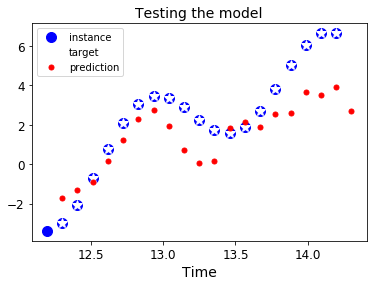

In [64]:
plt.title("Testing the model", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target")
plt.plot(t_instance[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

#### The Difficulty of Training over Many Time Steps
Just like any other deep neural net may suffer from vanishing/exploding gradients and take forever to train.

most of the solutions mentioned before work well here too. However, if RNN needs to handle even moderately long sequences, then training will still be very slow.

solution is to only unroll the RNN over limited number of time steps. (Truncated backpropagation through time)

Another problem of long running RNNs is the fact that the memory of the first inputs gradually fades away. solution is Long memory cells


## LSTM Cell
-----

The Long short-term memory. Consider the LSTM as a blackbox, it can be used very much like a basic cell, except it will preform better; training is faster and will detect long-term dependencies in the data. In tensorflow use BasicLSTMCell instead of BasicRNNCell.

In [ ]:
reset_graph()

lstm_cell = tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons)

LSTM cells manage two state vectors.

The key idea is that the network can learn what to store in the long-term state, what to throw away, and what to read from it.

#### Peephole Connections
In basic LSTM cell, the gate controller can only look at the input and the previous short-term state. Giving them extra context by letting them peek at the long-term state. Peephole connection: the previous long term state is added as an input state to the controller of the forget gate and input gate, and the cureent long-term state is added as input to the controller of the output gate

In [65]:
lstm_cell = tf.contrib.rnn.LSTMCell(num_units=n_neurons, use_peepholes=True)

#### GRU Cell
- both state vectors are merged into single vector
- a single gate controls both the forget gate and the input gate: if gate controller outputs 1, input gate open, forget gate closed.
- there is no output gate; the full state vector is output at every time step

In [67]:
gru_cell = tf.contrib.rnn.GRUCell(num_units=n_neurons)

## Natural Language Processing
-----

Very well covered by [Word2Vec](https://goo.gl/edArdi) and [Seq2Seq](https://goo.gl/L82gvS) tutorials

#### Word Embeddings
First choose a word representation, ex one-hot vector. But this is not efficient and doesn't hold any meaning in the representation

Solution is to use embeddings. which the network will learning during training. Similar words will gradually cluster close to one another

In [69]:
import errno
import os
import zipfile
from urllib.request import urlretrieve
WORDS_PATH = "datasets/words"
WORDS_URL = 'http://mattmahoney.net/dc/text8.zip'

def mkdir_p(path):
    """Create directories, ok if they already exist.
    
    This is for python 2 support. In python >=3.2, simply use:
    >>> os.makedirs(path, exist_ok=True)
    """
    try:
        os.makedirs(path)
    except OSError as exc:
        if exc.errno == errno.EEXIST and os.path.isdir(path):
            pass
        else:
            raise

def fetch_words_data(words_url=WORDS_URL, words_path=WORDS_PATH):
    os.makedirs(words_path, exist_ok=True)
    zip_path = os.path.join(words_path, "words.zip")
    if not os.path.exists(zip_path):
        urlretrieve(words_url, zip_path)
    with zipfile.ZipFile(zip_path) as f:
        data = f.read(f.namelist()[0])
    return data.decode("ascii").split()

In [70]:
words = fetch_words_data()

In [72]:
from collections import Counter

vocabulary_size = 50000

vocabulary = [("UNK", None)] + Counter(words).most_common(vocabulary_size - 1)
vocabulary = np.array([word for word, _ in vocabulary])
dictionary = {word: code for code, word in enumerate(vocabulary)}
data = np.array([dictionary.get(word, 0) for word in words])

In [74]:
" ".join(words[:9]), data[:9]

('anarchism originated as a term of abuse first used',
 array([5234, 3081,   12,    6,  195,    2, 3134,   46,   59]))

In [76]:
" ".join([vocabulary[word_index] for word_index in [5241, 3081, 12, 6, 195, 2, 3134, 46, 59]])

'cycles originated as a term of abuse first used'

In [77]:
words[24], data[24]

('culottes', 0)

In [78]:
from collections import deque

def generate_batch(batch_size, num_skips, skip_window):
    global data_index
    assert batch_size % num_skips == 0
    assert num_skips <= 2 * skip_window
    batch = np.ndarray(shape=[batch_size], dtype=np.int32)
    labels = np.ndarray(shape=[batch_size, 1], dtype=np.int32)
    span = 2 * skip_window + 1 # [ skip_window target skip_window ]
    buffer = deque(maxlen=span)
    for _ in range(span):
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)
    for i in range(batch_size // num_skips):
        target = skip_window  # target label at the center of the buffer
        targets_to_avoid = [ skip_window ]
        for j in range(num_skips):
            while target in targets_to_avoid:
                target = np.random.randint(0, span)
            targets_to_avoid.append(target)
            batch[i * num_skips + j] = buffer[skip_window]
            labels[i * num_skips + j, 0] = buffer[target]
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)
    return batch, labels

In [80]:
np.random.seed(42)
data_index = 0
batch, labels = generate_batch(8, 2, 1)
batch, [vocabulary[word] for word in batch]
labels, [vocabulary[word] for word in labels[:, 0]]

(array([[  12],
        [5234],
        [   6],
        [3081],
        [  12],
        [ 195],
        [   2],
        [   6]], dtype=int32),
 ['as', 'anarchism', 'a', 'originated', 'as', 'term', 'of', 'a'])

In [82]:
batch_size = 128
embedding_size = 128  # Dimension of the embedding vector.
skip_window = 1       # How many words to consider left and right.
num_skips = 2         # How many times to reuse an input to generate a label.

# We pick a random validation set to sample nearest neighbors. Here we limit the
# validation samples to the words that have a low numeric ID, which by
# construction are also the most frequent.
valid_size = 16     # Random set of words to evaluate similarity on.
valid_window = 100  # Only pick dev samples in the head of the distribution.
valid_examples = np.random.choice(valid_window, valid_size, replace=False)
num_sampled = 64    # Number of negative examples to sample.

learning_rate = 0.01

In [83]:
reset_graph()

# Input data.
train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])
valid_dataset = tf.constant(valid_examples, dtype=tf.int32)

In [84]:
vocabulary_size = 50000
embedding_size = 150

# Look up embeddings for inputs.
init_embeds = tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0)
embeddings = tf.Variable(init_embeds)

In [85]:
train_inputs = tf.placeholder(tf.int32, shape=[None])
embed = tf.nn.embedding_lookup(embeddings, train_inputs)

In [87]:
# Construct the variables for the NCE loss
nce_weights = tf.Variable(
    tf.truncated_normal([vocabulary_size, embedding_size],
                        stddev=1.0 / np.sqrt(embedding_size)))
nce_biases = tf.Variable(tf.zeros([vocabulary_size]))

# Compute the average NCE loss for the batch.
# tf.nce_loss automatically draws a new sample of the negative labels each
# time we evaluate the loss.
loss = tf.reduce_mean(
    tf.nn.nce_loss(nce_weights, nce_biases, train_labels, embed,
                   num_sampled, vocabulary_size))

# Construct the Adam optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

# Compute the cosine similarity between minibatch examples and all embeddings.
norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), axis=1, keepdims=True))
normalized_embeddings = embeddings / norm
valid_embeddings = tf.nn.embedding_lookup(normalized_embeddings, valid_dataset)
similarity = tf.matmul(valid_embeddings, normalized_embeddings, transpose_b=True)

# Add variable initializer.
init = tf.global_variables_initializer()

In [88]:
num_steps = 10001

with tf.Session() as session:
    init.run()

    average_loss = 0
    for step in range(num_steps):
        print("\rIteration: {}".format(step), end="\t")
        batch_inputs, batch_labels = generate_batch(batch_size, num_skips, skip_window)
        feed_dict = {train_inputs : batch_inputs, train_labels : batch_labels}

        # We perform one update step by evaluating the training op (including it
        # in the list of returned values for session.run()
        _, loss_val = session.run([training_op, loss], feed_dict=feed_dict)
        average_loss += loss_val

        if step % 2000 == 0:
            if step > 0:
                average_loss /= 2000
            # The average loss is an estimate of the loss over the last 2000 batches.
            print("Average loss at step ", step, ": ", average_loss)
            average_loss = 0

        # Note that this is expensive (~20% slowdown if computed every 500 steps)
        if step % 10000 == 0:
            sim = similarity.eval()
            for i in range(valid_size):
                valid_word = vocabulary[valid_examples[i]]
                top_k = 8 # number of nearest neighbors
                nearest = (-sim[i, :]).argsort()[1:top_k+1]
                log_str = "Nearest to %s:" % valid_word
                for k in range(top_k):
                    close_word = vocabulary[nearest[k]]
                    log_str = "%s %s," % (log_str, close_word)
                print(log_str)

    final_embeddings = normalized_embeddings.eval()

Iteration: 0	

Average loss at step  0 :  287.5924072265625
Nearest to often: presses, convenience, arabidopsis, jewry, mapuche, guts, macrinus, implemented,
Nearest to s: drang, volleys, stacking, hypomanic, sash, kenneth, deutschland, iau,
Nearest to his: pointers, ponty, charged, achieved, rk, blooming, value, juggernaut,
Nearest to three: nawab, infestation, picard, miyazaki, engenders, inventories, consular, tolerated,
Nearest to years: ogden, arabia, rostock, contingents, celia, jaian, militaristic, undercut,
Nearest to united: iii, citizen, crows, decimals, eutelsat, dcc, auckland, ennis,
Nearest to may: failure, rna, efficacious, aspirin, lecompton, definitive, geese, amphibious,
Nearest to some: reduced, isaacs, gdr, phosphoric, instrumentation, gubernatorial, crime, kanem,
Nearest to that: secretions, pron, disputed, emmy, sibling, wo, banned, agora,
Nearest to its: knob, abeokuta, bracelet, bastards, ivens, objectivity, blanton, cold,
Nearest to these: pedro, condoned, neck, ssn, supervisi

Iteration: 15	

Iteration: 25	

Iteration: 35	

Iteration: 45	

Iteration: 55	

Iteration: 66	

Iteration: 77	

Iteration: 88	

Iteration: 98	

Iteration: 109	

Iteration: 119	

Iteration: 129	

Iteration: 140	

Iteration: 151	

Iteration: 161	

Iteration: 171	

Iteration: 182	

Iteration: 192	

Iteration: 202	

Iteration: 212	

Iteration: 223	

Iteration: 234	

Iteration: 244	

Iteration: 254	

Iteration: 265	

Iteration: 276	

Iteration: 287	

Iteration: 298	

Iteration: 308	

Iteration: 318	

Iteration: 329	

Iteration: 340	

Iteration: 350	

Iteration: 361	

Iteration: 372	

Iteration: 382	

Iteration: 392	

Iteration: 403	

Iteration: 413	

Iteration: 423	

Iteration: 433	

Iteration: 444	

Iteration: 454	

Iteration: 465	

Iteration: 476	

Iteration: 487	

Iteration: 498	

Iteration: 509	

Iteration: 520	

Iteration: 531	

Iteration: 542	

Iteration: 553	

Iteration: 563	

Iteration: 574	

Iteration: 585	

Iteration: 595	

Iteration: 606	

Iteration: 617	

Iteration: 627	

Iteration: 637	

Iteration: 647	

Iteration: 657	

Iteration: 667	

Iteration: 677	

Iteration: 688	

Iteration: 698	

Iteration: 708	

Iteration: 719	

Iteration: 729	

Iteration: 739	

Iteration: 749	

Iteration: 759	

Iteration: 769	

Iteration: 780	

Iteration: 790	

Iteration: 800	

Iteration: 810	

Iteration: 820	

Iteration: 831	

Iteration: 841	

Iteration: 852	

Iteration: 863	

Iteration: 873	

Iteration: 883	

Iteration: 893	

Iteration: 903	

Iteration: 913	

Iteration: 923	

Iteration: 933	

Iteration: 943	

Iteration: 953	

Iteration: 963	

Iteration: 973	

Iteration: 983	

Iteration: 994	

Iteration: 1005	

Iteration: 1016	

Iteration: 1026	

Iteration: 1036	

Iteration: 1047	

Iteration: 1057	

Iteration: 1068	

Iteration: 1079	

Iteration: 1089	

Iteration: 1099	

Iteration: 1109	

Iteration: 1120	

Iteration: 1130	

Iteration: 1141	

Iteration: 1151	

Iteration: 1161	

Iteration: 1171	

Iteration: 1182	

Iteration: 1192	

Iteration: 1202	

Iteration: 1212	

Iteration: 1222	

Iteration: 1232	

Iteration: 1242	

Iteration: 1252	

Iteration: 1262	

Iteration: 1272	

Iteration: 1282	

Iteration: 1292	

Iteration: 1302	

Iteration: 1312	

Iteration: 1322	

Iteration: 1332	

Iteration: 1342	

Iteration: 1352	

Iteration: 1362	

Iteration: 1372	

Iteration: 1383	

Iteration: 1393	

Iteration: 1403	

Iteration: 1413	

Iteration: 1423	

Iteration: 1434	

Iteration: 1445	

Iteration: 1455	

Iteration: 1466	

Iteration: 1477	

Iteration: 1487	

Iteration: 1498	

Iteration: 1509	

Iteration: 1520	

Iteration: 1531	

Iteration: 1542	

Iteration: 1552	

Iteration: 1562	

Iteration: 1572	

Iteration: 1582	

Iteration: 1592	

Iteration: 1603	

Iteration: 1613	

Iteration: 1624	

Iteration: 1635	

Iteration: 1646	

Iteration: 1657	

Iteration: 1668	

Iteration: 1678	

Iteration: 1688	

Iteration: 1699	

Iteration: 1709	

Iteration: 1719	

Iteration: 1730	

Iteration: 1740	

Iteration: 1750	

Iteration: 1760	

Iteration: 1770	

Iteration: 1780	

Iteration: 1790	

Iteration: 1800	

Iteration: 1810	

Iteration: 1820	

Iteration: 1830	

Iteration: 1840	

Iteration: 1850	

Iteration: 1860	

Iteration: 1871	

Iteration: 1881	

Iteration: 1892	

Iteration: 1902	

Iteration: 1913	

Iteration: 1923	

Iteration: 1933	

Iteration: 1943	

Iteration: 1954	

Iteration: 1964	

Iteration: 1974	

Iteration: 1984	

Iteration: 1995	

Iteration: 2000	Average loss at step  2000 :  130.93915377235413
Iteration: 2005	

Iteration: 2015	

Iteration: 2026	

Iteration: 2036	

Iteration: 2046	

Iteration: 2056	

Iteration: 2067	

Iteration: 2078	

Iteration: 2088	

Iteration: 2098	

Iteration: 2108	

Iteration: 2118	

Iteration: 2129	

Iteration: 2139	

Iteration: 2150	

Iteration: 2161	

Iteration: 2171	

Iteration: 2182	

Iteration: 2193	

Iteration: 2203	

Iteration: 2213	

Iteration: 2224	

Iteration: 2234	

Iteration: 2244	

Iteration: 2254	

Iteration: 2264	

Iteration: 2274	

Iteration: 2284	

Iteration: 2294	

Iteration: 2304	

Iteration: 2314	

Iteration: 2325	

Iteration: 2335	

Iteration: 2345	

Iteration: 2355	

Iteration: 2366	

Iteration: 2376	

Iteration: 2386	

Iteration: 2397	

Iteration: 2407	

Iteration: 2417	

Iteration: 2427	

Iteration: 2438	

Iteration: 2448	

Iteration: 2458	

Iteration: 2468	

Iteration: 2479	

Iteration: 2489	

Iteration: 2499	

Iteration: 2509	

Iteration: 2520	

Iteration: 2531	

Iteration: 2541	

Iteration: 2551	

Iteration: 2562	

Iteration: 2573	

Iteration: 2583	

Iteration: 2594	

Iteration: 2604	

Iteration: 2614	

Iteration: 2625	

Iteration: 2635	

Iteration: 2645	

Iteration: 2655	

Iteration: 2665	

Iteration: 2676	

Iteration: 2686	

Iteration: 2696	

Iteration: 2707	

Iteration: 2717	

Iteration: 2728	

Iteration: 2738	

Iteration: 2748	

Iteration: 2758	

Iteration: 2768	

Iteration: 2778	

Iteration: 2788	

Iteration: 2798	

Iteration: 2808	

Iteration: 2818	

Iteration: 2829	

Iteration: 2840	

Iteration: 2851	

Iteration: 2861	

Iteration: 2871	

Iteration: 2882	

Iteration: 2893	

Iteration: 2904	

Iteration: 2915	

Iteration: 2926	

Iteration: 2936	

Iteration: 2946	

Iteration: 2956	

Iteration: 2967	

Iteration: 2978	

Iteration: 2989	

Iteration: 3000	

Iteration: 3011	

Iteration: 3021	

Iteration: 3031	

Iteration: 3041	

Iteration: 3052	

Iteration: 3063	

Iteration: 3074	

Iteration: 3084	

Iteration: 3094	

Iteration: 3104	

Iteration: 3114	

Iteration: 3124	

Iteration: 3134	

Iteration: 3145	

Iteration: 3155	

Iteration: 3165	

Iteration: 3175	

Iteration: 3185	

Iteration: 3195	

Iteration: 3206	

Iteration: 3216	

Iteration: 3226	

Iteration: 3236	

Iteration: 3247	

Iteration: 3258	

Iteration: 3268	

Iteration: 3278	

Iteration: 3288	

Iteration: 3299	

Iteration: 3310	

Iteration: 3320	

Iteration: 3331	

Iteration: 3341	

Iteration: 3351	

Iteration: 3361	

Iteration: 3372	

Iteration: 3382	

Iteration: 3393	

Iteration: 3403	

Iteration: 3414	

Iteration: 3425	

Iteration: 3436	

Iteration: 3446	

Iteration: 3456	

Iteration: 3466	

Iteration: 3476	

Iteration: 3487	

Iteration: 3497	

Iteration: 3508	

Iteration: 3518	

Iteration: 3529	

Iteration: 3539	

Iteration: 3550	

Iteration: 3560	

Iteration: 3571	

Iteration: 3582	

Iteration: 3592	

Iteration: 3603	

Iteration: 3614	

Iteration: 3625	

Iteration: 3636	

Iteration: 3646	

Iteration: 3657	

Iteration: 3668	

Iteration: 3678	

Iteration: 3689	

Iteration: 3700	

Iteration: 3710	

Iteration: 3721	

Iteration: 3731	

Iteration: 3741	

Iteration: 3752	

Iteration: 3762	

Iteration: 3772	

Iteration: 3782	

Iteration: 3792	

Iteration: 3802	

Iteration: 3812	

Iteration: 3822	

Iteration: 3833	

Iteration: 3843	

Iteration: 3853	

Iteration: 3864	

Iteration: 3875	

Iteration: 3885	

Iteration: 3896	

Iteration: 3906	

Iteration: 3916	

Iteration: 3926	

Iteration: 3937	

Iteration: 3948	

Iteration: 3958	

Iteration: 3969	

Iteration: 3979	

Iteration: 3990	

Iteration: 4000	

Average loss at step  4000 :  62.691802453994754
Iteration: 4010	

Iteration: 4020	

Iteration: 4031	

Iteration: 4041	

Iteration: 4052	

Iteration: 4063	

Iteration: 4074	

Iteration: 4084	

Iteration: 4095	

Iteration: 4105	

Iteration: 4115	

Iteration: 4125	

Iteration: 4136	

Iteration: 4147	

Iteration: 4157	

Iteration: 4167	

Iteration: 4177	

Iteration: 4187	

Iteration: 4197	

Iteration: 4207	

Iteration: 4217	

Iteration: 4227	

Iteration: 4238	

Iteration: 4249	

Iteration: 4260	

Iteration: 4271	

Iteration: 4281	

Iteration: 4291	

Iteration: 4301	

Iteration: 4311	

Iteration: 4321	

Iteration: 4332	

Iteration: 4342	

Iteration: 4353	

Iteration: 4363	

Iteration: 4374	

Iteration: 4384	

Iteration: 4395	

Iteration: 4405	

Iteration: 4415	

Iteration: 4425	

Iteration: 4435	

Iteration: 4445	

Iteration: 4455	

Iteration: 4465	

Iteration: 4476	

Iteration: 4486	

Iteration: 4496	

Iteration: 4507	

Iteration: 4518	

Iteration: 4529	

Iteration: 4540	

Iteration: 4551	

Iteration: 4562	

Iteration: 4573	

Iteration: 4583	

Iteration: 4594	

Iteration: 4604	

Iteration: 4615	

Iteration: 4626	

Iteration: 4636	

Iteration: 4646	

Iteration: 4657	

Iteration: 4667	

Iteration: 4677	

Iteration: 4687	

Iteration: 4697	

Iteration: 4707	

Iteration: 4718	

Iteration: 4729	

Iteration: 4740	

Iteration: 4750	

Iteration: 4760	

Iteration: 4771	

Iteration: 4781	

Iteration: 4791	

Iteration: 4802	

Iteration: 4812	

Iteration: 4822	

Iteration: 4832	

Iteration: 4842	

Iteration: 4853	

Iteration: 4863	

Iteration: 4873	

Iteration: 4884	

Iteration: 4894	

Iteration: 4904	

Iteration: 4915	

Iteration: 4926	

Iteration: 4937	

Iteration: 4948	

Iteration: 4959	

Iteration: 4970	

Iteration: 4981	

Iteration: 4991	

Iteration: 5002	

Iteration: 5012	

Iteration: 5023	

Iteration: 5034	

Iteration: 5044	

Iteration: 5055	

Iteration: 5066	

Iteration: 5077	

Iteration: 5087	

Iteration: 5097	

Iteration: 5108	

Iteration: 5118	

Iteration: 5128	

Iteration: 5138	

Iteration: 5149	

Iteration: 5160	

Iteration: 5171	

Iteration: 5181	

Iteration: 5192	

Iteration: 5202	

Iteration: 5213	

Iteration: 5223	

Iteration: 5233	

Iteration: 5243	

Iteration: 5254	

Iteration: 5265	

Iteration: 5276	

Iteration: 5286	

Iteration: 5296	

Iteration: 5307	

Iteration: 5317	

Iteration: 5327	

Iteration: 5337	

Iteration: 5348	

Iteration: 5358	

Iteration: 5368	

Iteration: 5378	

Iteration: 5388	

Iteration: 5398	

Iteration: 5409	

Iteration: 5419	

Iteration: 5429	

Iteration: 5439	

Iteration: 5449	

Iteration: 5460	

Iteration: 5471	

Iteration: 5482	

Iteration: 5493	

Iteration: 5504	

Iteration: 5514	

Iteration: 5524	

Iteration: 5534	

Iteration: 5544	

Iteration: 5554	

Iteration: 5565	

Iteration: 5576	

Iteration: 5586	

Iteration: 5596	

Iteration: 5606	

Iteration: 5617	

Iteration: 5627	

Iteration: 5637	

Iteration: 5647	

Iteration: 5657	

Iteration: 5668	

Iteration: 5678	

Iteration: 5689	

Iteration: 5699	

Iteration: 5709	

Iteration: 5719	

Iteration: 5729	

Iteration: 5739	

Iteration: 5749	

Iteration: 5759	

Iteration: 5770	

Iteration: 5780	

Iteration: 5791	

Iteration: 5801	

Iteration: 5811	

Iteration: 5821	

Iteration: 5831	

Iteration: 5842	

Iteration: 5853	

Iteration: 5863	

Iteration: 5873	

Iteration: 5884	

Iteration: 5895	

Iteration: 5906	

Iteration: 5916	

Iteration: 5926	

Iteration: 5936	

Iteration: 5947	

Iteration: 5957	

Iteration: 5967	

Iteration: 5977	

Iteration: 5988	

Iteration: 5998	

Iteration: 6000	Average loss at step  6000 :  42.13599577355385
Iteration: 6009	

Iteration: 6019	

Iteration: 6029	

Iteration: 6039	

Iteration: 6050	

Iteration: 6060	

Iteration: 6070	

Iteration: 6081	

Iteration: 6091	

Iteration: 6101	

Iteration: 6111	

Iteration: 6121	

Iteration: 6132	

Iteration: 6142	

Iteration: 6153	

Iteration: 6164	

Iteration: 6175	

Iteration: 6185	

Iteration: 6196	

Iteration: 6206	

Iteration: 6216	

Iteration: 6226	

Iteration: 6236	

Iteration: 6247	

Iteration: 6257	

Iteration: 6267	

Iteration: 6278	

Iteration: 6288	

Iteration: 6299	

Iteration: 6309	

Iteration: 6319	

Iteration: 6329	

Iteration: 6339	

Iteration: 6349	

Iteration: 6359	

Iteration: 6369	

Iteration: 6380	

Iteration: 6390	

Iteration: 6400	

Iteration: 6410	

Iteration: 6420	

Iteration: 6431	

Iteration: 6441	

Iteration: 6451	

Iteration: 6462	

Iteration: 6472	

Iteration: 6483	

Iteration: 6493	

Iteration: 6504	

Iteration: 6515	

Iteration: 6525	

Iteration: 6535	

Iteration: 6545	

Iteration: 6555	

Iteration: 6565	

Iteration: 6576	

Iteration: 6586	

Iteration: 6596	

Iteration: 6607	

Iteration: 6617	

Iteration: 6627	

Iteration: 6638	

Iteration: 6649	

Iteration: 6659	

Iteration: 6670	

Iteration: 6680	

Iteration: 6690	

Iteration: 6700	

Iteration: 6711	

Iteration: 6722	

Iteration: 6732	

Iteration: 6743	

Iteration: 6753	

Iteration: 6764	

Iteration: 6774	

Iteration: 6784	

Iteration: 6794	

Iteration: 6804	

Iteration: 6815	

Iteration: 6826	

Iteration: 6836	

Iteration: 6847	

Iteration: 6857	

Iteration: 6868	

Iteration: 6878	

Iteration: 6888	

Iteration: 6898	

Iteration: 6908	

Iteration: 6919	

Iteration: 6930	

Iteration: 6941	

Iteration: 6951	

Iteration: 6962	

Iteration: 6973	

Iteration: 6984	

Iteration: 6994	

Iteration: 7004	

Iteration: 7015	

Iteration: 7025	

Iteration: 7035	

Iteration: 7045	

Iteration: 7055	

Iteration: 7065	

Iteration: 7076	

Iteration: 7087	

Iteration: 7098	

Iteration: 7108	

Iteration: 7118	

Iteration: 7129	

Iteration: 7140	

Iteration: 7151	

Iteration: 7161	

Iteration: 7171	

Iteration: 7182	

Iteration: 7192	

Iteration: 7202	

Iteration: 7212	

Iteration: 7222	

Iteration: 7232	

Iteration: 7243	

Iteration: 7253	

Iteration: 7263	

Iteration: 7273	

Iteration: 7283	

Iteration: 7294	

Iteration: 7305	

Iteration: 7316	

Iteration: 7326	

Iteration: 7336	

Iteration: 7346	

Iteration: 7356	

Iteration: 7366	

Iteration: 7377	

Iteration: 7387	

Iteration: 7397	

Iteration: 7407	

Iteration: 7417	

Iteration: 7428	

Iteration: 7439	

Iteration: 7449	

Iteration: 7459	

Iteration: 7469	

Iteration: 7479	

Iteration: 7489	

Iteration: 7500	

Iteration: 7510	

Iteration: 7520	

Iteration: 7530	

Iteration: 7540	

Iteration: 7550	

Iteration: 7560	

Iteration: 7571	

Iteration: 7582	

Iteration: 7592	

Iteration: 7603	

Iteration: 7614	

Iteration: 7624	

Iteration: 7635	

Iteration: 7646	

Iteration: 7657	

Iteration: 7667	

Iteration: 7677	

Iteration: 7688	

Iteration: 7698	

Iteration: 7708	

Iteration: 7719	

Iteration: 7730	

Iteration: 7740	

Iteration: 7751	

Iteration: 7761	

Iteration: 7771	

Iteration: 7781	

Iteration: 7791	

Iteration: 7801	

Iteration: 7811	

Iteration: 7821	

Iteration: 7832	

Iteration: 7842	

Iteration: 7853	

Iteration: 7863	

Iteration: 7873	

Iteration: 7883	

Iteration: 7893	

Iteration: 7903	

Iteration: 7913	

Iteration: 7924	

Iteration: 7935	

Iteration: 7946	

Iteration: 7956	

Iteration: 7966	

Iteration: 7976	

Iteration: 7986	

Iteration: 7997	

Iteration: 8000	Average loss at step  8000 :  31.438352041244507
Iteration: 8008	

Iteration: 8018	

Iteration: 8028	

Iteration: 8038	

Iteration: 8048	

Iteration: 8059	

Iteration: 8070	

Iteration: 8080	

Iteration: 8091	

Iteration: 8101	

Iteration: 8112	

Iteration: 8122	

Iteration: 8132	

Iteration: 8143	

Iteration: 8154	

Iteration: 8164	

Iteration: 8174	

Iteration: 8184	

Iteration: 8194	

Iteration: 8204	

Iteration: 8215	

Iteration: 8226	

Iteration: 8237	

Iteration: 8248	

Iteration: 8258	

Iteration: 8269	

Iteration: 8279	

Iteration: 8290	

Iteration: 8301	

Iteration: 8311	

Iteration: 8321	

Iteration: 8331	

Iteration: 8341	

Iteration: 8351	

Iteration: 8361	

Iteration: 8372	

Iteration: 8383	

Iteration: 8394	

Iteration: 8404	

Iteration: 8415	

Iteration: 8425	

Iteration: 8435	

Iteration: 8446	

Iteration: 8456	

Iteration: 8467	

Iteration: 8477	

Iteration: 8488	

Iteration: 8499	

Iteration: 8509	

Iteration: 8520	

Iteration: 8531	

Iteration: 8541	

Iteration: 8551	

Iteration: 8561	

Iteration: 8572	

Iteration: 8582	

Iteration: 8593	

Iteration: 8603	

Iteration: 8613	

Iteration: 8623	

Iteration: 8633	

Iteration: 8644	

Iteration: 8655	

Iteration: 8665	

Iteration: 8675	

Iteration: 8685	

Iteration: 8696	

Iteration: 8706	

Iteration: 8717	

Iteration: 8727	

Iteration: 8738	

Iteration: 8749	

Iteration: 8759	

Iteration: 8769	

Iteration: 8779	

Iteration: 8790	

Iteration: 8800	

Iteration: 8811	

Iteration: 8821	

Iteration: 8831	

Iteration: 8841	

Iteration: 8851	

Iteration: 8861	

Iteration: 8871	

Iteration: 8882	

Iteration: 8892	

Iteration: 8902	

Iteration: 8912	

Iteration: 8922	

Iteration: 8932	

Iteration: 8943	

Iteration: 8953	

Iteration: 8964	

Iteration: 8974	

Iteration: 8984	

Iteration: 8995	

Iteration: 9005	

Iteration: 9015	

Iteration: 9026	

Iteration: 9036	

Iteration: 9046	

Iteration: 9056	

Iteration: 9066	

Iteration: 9076	

Iteration: 9086	

Iteration: 9096	

Iteration: 9106	

Iteration: 9117	

Iteration: 9127	

Iteration: 9138	

Iteration: 9149	

Iteration: 9160	

Iteration: 9170	

Iteration: 9180	

Iteration: 9190	

Iteration: 9200	

Iteration: 9211	

Iteration: 9222	

Iteration: 9232	

Iteration: 9242	

Iteration: 9252	

Iteration: 9263	

Iteration: 9273	

Iteration: 9283	

Iteration: 9293	

Iteration: 9303	

Iteration: 9313	

Iteration: 9323	

Iteration: 9334	

Iteration: 9345	

Iteration: 9356	

Iteration: 9366	

Iteration: 9376	

Iteration: 9387	

Iteration: 9398	

Iteration: 9409	

Iteration: 9419	

Iteration: 9429	

Iteration: 9440	

Iteration: 9451	

Iteration: 9462	

Iteration: 9472	

Iteration: 9483	

Iteration: 9494	

Iteration: 9504	

Iteration: 9515	

Iteration: 9525	

Iteration: 9535	

Iteration: 9545	

Iteration: 9556	

Iteration: 9567	

Iteration: 9578	

Iteration: 9588	

Iteration: 9598	

Iteration: 9608	

Iteration: 9618	

Iteration: 9629	

Iteration: 9639	

Iteration: 9650	

Iteration: 9660	

Iteration: 9671	

Iteration: 9682	

Iteration: 9693	

Iteration: 9703	

Iteration: 9713	

Iteration: 9724	

Iteration: 9735	

Iteration: 9745	

Iteration: 9755	

Iteration: 9765	

Iteration: 9775	

Iteration: 9786	

Iteration: 9796	

Iteration: 9806	

Iteration: 9816	

Iteration: 9826	

Iteration: 9836	

Iteration: 9847	

Iteration: 9857	

Iteration: 9867	

Iteration: 9877	

Iteration: 9888	

Iteration: 9898	

Iteration: 9909	

Iteration: 9919	

Iteration: 9930	

Iteration: 9940	

Iteration: 9950	

Iteration: 9960	

Iteration: 9970	

Iteration: 9980	

Iteration: 9990	

Iteration: 10000	Average loss at step  10000 :  26.112293479919433


Nearest to often: scheele, described, prestigious, who, unnamed, widely, nationalities, dddddd,
Nearest to s: the, appended, aquarius, zero, and, hebrides, of, gide,
Nearest to his: the, spite, dwan, mctaggart, peloponnese, arslan, replicants, seo,
Nearest to three: two, four, five, zero, one, nine, eight, UNK,
Nearest to years: four, bright, levitt, pka, cosmology, calendar, filters, bj,
Nearest to united: states, upon, answers, permutation, in, ankh, horch, ufos,
Nearest to may: doesn, hybridized, can, or, almond, used, seo, afghana,
Nearest to some: lunches, enveloped, the, cma, warming, albany, artifacts, illyrians,
Nearest to that: kurosawa, gringo, hangover, fame, adriatic, to, subfields, this,
Nearest to its: the, exports, tillich, tag, completeness, aq, appended, ustinov,
Nearest to these: are, var, extracting, photosynthesis, erotica, gettysburg, characteristically, jabir,
Nearest to people: many, manzikert, subproblems, guerra, illyrians, ankh, artificially, bread,
Nearest to

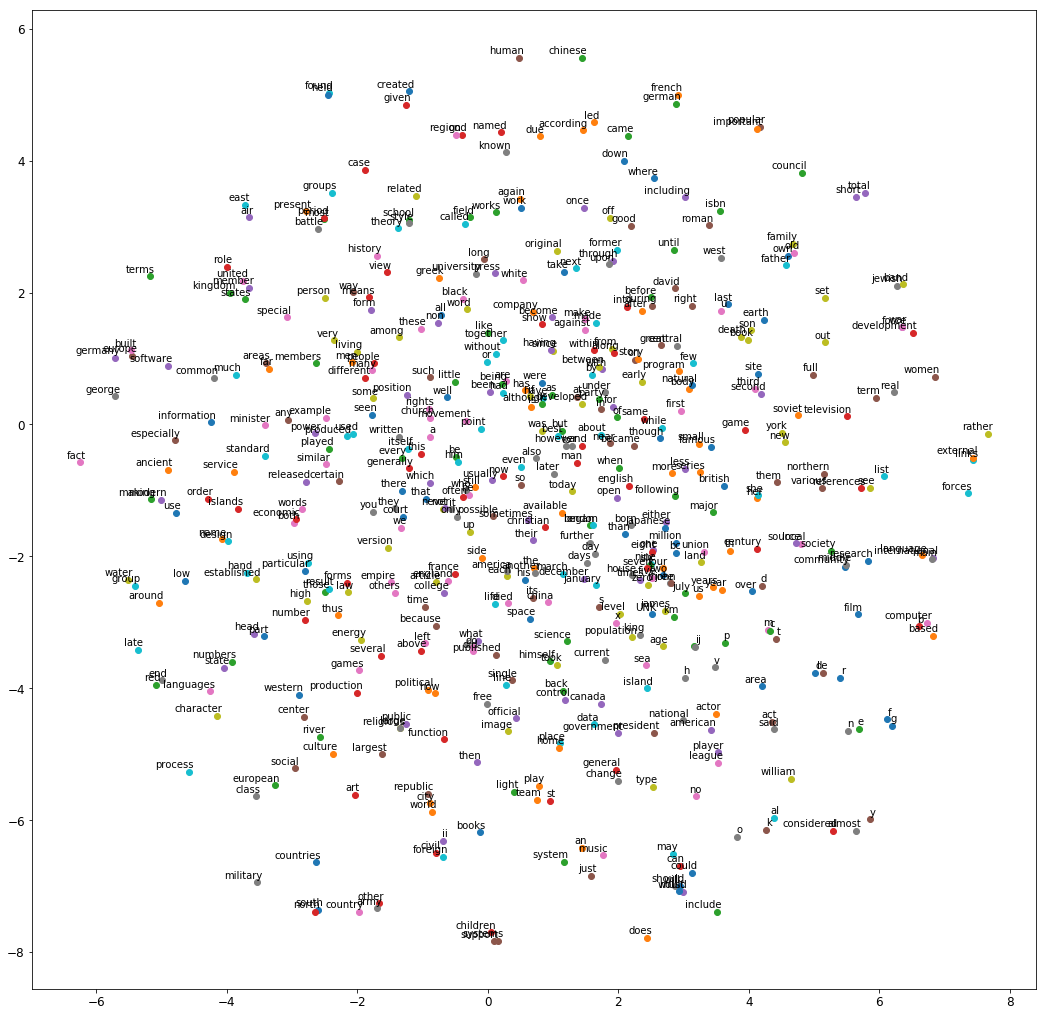

In [90]:
def plot_with_labels(low_dim_embs, labels):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=(18, 18))  #in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i,:]
        plt.scatter(x, y)
        plt.annotate(label,
                     xy=(x, y),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
        
from sklearn.manifold import TSNE

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
plot_only = 500
low_dim_embs = tsne.fit_transform(final_embeddings[:plot_only,:])
labels = [vocabulary[i] for i in range(plot_only)]
plot_with_labels(low_dim_embs, labels)

#### An Encorder-Decoder Network for Machine Translation

[Simple ML Translation Model](https://goo.gl/0g9zWP)

## Exercises
-----

1. seq2seq: machine translation, music generation. seq2vec: sentiment analysis. vec2seq: image captioning
2. it make more sence to look at the sequence as a whole, so encoding the sequence is more valuable. In machine tanslation, if RNN are used without encoder-decoder it would just translate word by word instead of by sentence.
3. A video is a time series of images, so one could use a convolutional network to look at the image at a time step and feed the output to seq2vec RNN for each time step/
4. based on while_loop() operation that is able to swap the gpu mem to cpu memo during backprop. easier to use. generates smaller graph
5. Set sequence_length param. you can use padding trick
6. each layer on a different GPU
